In [6]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# chicago crime data file
crime_path = "Resources/chicago_crimes_all_cleaned.csv"

# Read the mouse data and put into a dataframe
crime = pd.read_csv(crime_path)
crime_df = pd.DataFrame(crime)

# Display the data table for preview
crime_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11561837,JC110056,12/31/2018 11:59:00 PM,013XX W 72ND ST,1153,THEFT (ALL TYPES),FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,6.0,67.0,11,1168573.0,1857018.0,2018,01/17/2019 02:26:36 PM,41.763181,-87.657709,"(41.763181359, -87.657709477)"
1,11556487,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,1320,MINOR PROPERTY CRIME,TO VEHICLE,STREET,False,False,...,19.0,74.0,14,1158309.0,1829936.0,2018,01/10/2019 03:16:50 PM,41.689079,-87.696064,"(41.689078832, -87.696064026)"
2,11552699,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,1310,MINOR PROPERTY CRIME,TO PROPERTY,APARTMENT,False,False,...,21.0,71.0,14,1171454.0,1848783.0,2018,01/10/2019 03:16:50 PM,41.740521,-87.647391,"(41.740520866, -87.647390719)"
3,11552724,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,0440,ASSAULT & BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,OTHER,True,False,...,25.0,31.0,08B,1168327.0,1891230.0,2018,01/10/2019 03:16:50 PM,41.857068,-87.657625,"(41.857068095, -87.657625201)"
4,11552731,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,0486,ASSAULT & BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,False,...,17.0,71.0,08B,1171332.0,1852934.0,2018,01/10/2019 03:16:50 PM,41.751914,-87.647717,"(41.75191443, -87.647716532)"


In [7]:
#list all the columns available in the df
crime_df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [8]:
#get the counts of the "Primary Type" of crime committed
counts_crime = crime_df["Primary Type"].value_counts()
counts_crime

THEFT (ALL TYPES)                   502983
ASSAULT & BATTERY                   324862
MINOR PROPERTY CRIME                157246
OTHER MINOR CRIMES                   88674
DRUG RELATED                         46229
WEAPONS RELATED CRIME                38837
SEXUAL RELATED CRIME                 13465
OFFENSE INVOLVING CHILDREN           10592
HOMICIDE                              3439
ARSON                                 2288
KIDNAPPING AND HUMAN TRAFFICKING       728
NON-CRIMINAL (SUBJECT SPECIFIED)         3
Name: Primary Type, dtype: int64

In [9]:
# Look at which crimes were most prevalent by district
district_df = crime_df.groupby(["District"])["Primary Type"].value_counts()
district_df

District  Primary Type              
1         THEFT (ALL TYPES)             38640
          ASSAULT & BATTERY             11854
          MINOR PROPERTY CRIME           5943
          OTHER MINOR CRIMES             2920
          DRUG RELATED                    739
                                        ...  
31        MINOR PROPERTY CRIME              8
          OFFENSE INVOLVING CHILDREN        4
          SEXUAL RELATED CRIME              4
          OTHER MINOR CRIMES                3
          WEAPONS RELATED CRIME             1
Name: Primary Type, Length: 251, dtype: int64

In [10]:
#Re-group 'primary types' into consolidated types
crime_cleaned_df = crime_df.replace({"THEFT":"THEFT (ALL TYPES)","MOTOR VEHICLE THEFT":"THEFT (ALL TYPES)","ROBBERY":"THEFT (ALL TYPES)", 
                                    "BURGLARY":"THEFT (ALL TYPES)","DECEPTIVE PRACTICE":"THEFT (ALL TYPES)",
                                    "PUBLIC PEACE VIOLATION":"OTHER MINOR CRIMES","INTERFERENCE WITH PUBLIC OFFICER":"OTHER MINOR CRIMES",
                                    "LIQUOR LAW VIOLATION":"OTHER MINOR CRIMES","OBSCENITY":"OTHER MINOR CRIMES","GAMBLING":"OTHER MINOR CRIMES",
                                    "NON-CRIMINAL":"OTHER MINOR CRIMES","PUBLIC INDECENCY":"OTHER MINOR CRIMES","OTHER OFFENSE":"OTHER MINOR CRIMES",
                                    "PROSTITUTION":"OTHER MINOR CRIMES","KIDNAPPING":"KIDNAPPING AND HUMAN TRAFFICKING","HUMAN TRAFFICKING" : "KIDNAPPING AND HUMAN TRAFFICKING",
                                    "NARCOTICS":"DRUG RELATED","OTHER NARCOTIC VIOLATION":"DRUG RELATED","ASSAULT": "ASSAULT & BATTERY","BATTERY": "ASSAULT & BATTERY",
                                    "RITUALISM":"ASSAULT & BATTERY","STALKING":"ASSAULT & BATTERY","INTIMIDATION":"ASSAULT & BATTERY","CRIMINAL TRESPASS":"MINOR PROPERTY CRIME",
                                    "CRIMINAL DAMAGE":"MINOR PROPERTY CRIME","CRIM SEXUAL ASSAULT": "SEXUAL RELATED CRIME","CRIMINAL SEXUAL ASSAULT": "SEXUAL RELATED CRIME",
                                    "SEX OFFENSE": "SEXUAL RELATED CRIME","WEAPONS VIOLATION":"WEAPONS RELATED CRIME","CONCEALED CARRY LICENSE VIOLATION":"WEAPONS RELATED CRIME"})

crime_cleaned_df = crime_cleaned_df.dropna(how = "any")
crime_cleaned_df.head()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1,11556487,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,1320,MINOR PROPERTY CRIME,TO VEHICLE,STREET,False,False,...,19.0,74.0,14,1158309.0,1829936.0,2018,01/10/2019 03:16:50 PM,41.689079,-87.696064,"(41.689078832, -87.696064026)"
2,11552699,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,1310,MINOR PROPERTY CRIME,TO PROPERTY,APARTMENT,False,False,...,21.0,71.0,14,1171454.0,1848783.0,2018,01/10/2019 03:16:50 PM,41.740521,-87.647391,"(41.740520866, -87.647390719)"
3,11552724,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,0440,ASSAULT & BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,OTHER,True,False,...,25.0,31.0,08B,1168327.0,1891230.0,2018,01/10/2019 03:16:50 PM,41.857068,-87.657625,"(41.857068095, -87.657625201)"
4,11552731,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,0486,ASSAULT & BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,False,...,17.0,71.0,08B,1171332.0,1852934.0,2018,01/10/2019 03:16:50 PM,41.751914,-87.647717,"(41.75191443, -87.647716532)"
5,11552715,JC100026,12/31/2018 11:49:00 PM,052XX W GLADYS AVE,041A,ASSAULT & BATTERY,AGGRAVATED - HANDGUN,STREET,False,False,...,29.0,25.0,04B,1140262.0,1897810.0,2018,03/28/2020 03:47:02 PM,41.875684,-87.760479,"(41.87568438, -87.760479356)"


In [11]:
#remove unnecessary columns
crime_cleaned_df = crime_cleaned_df[["Case Number", "Date", "Block", "Primary Type", "Description", "District", "Ward",
                                     "Year", "Latitude", "Longitude"]]
crime_cleaned_df.head()

,Case Number,Date,Block,Primary Type,Description,District,Ward,Year,Latitude,Longitude
1,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,MINOR PROPERTY CRIME,TO VEHICLE,22,19.0,2018,41.689079,-87.696064
2,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,MINOR PROPERTY CRIME,TO PROPERTY,6,21.0,2018,41.740521,-87.647391
3,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,ASSAULT & BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,12,25.0,2018,41.857068,-87.657625
4,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,ASSAULT & BATTERY,DOMESTIC BATTERY SIMPLE,6,17.0,2018,41.751914,-87.647717
5,JC100026,12/31/2018 11:49:00 PM,052XX W GLADYS AVE,ASSAULT & BATTERY,AGGRAVATED - HANDGUN,15,29.0,2018,41.875684,-87.760479


In [12]:
# #add a new column for zip codes
# crime_cleaned_df["Zip Code"] = "" 

# #display the new df
# crime_cleaned_df.head()

In [13]:
# #Make the base url to use to gain the zip code from Nominatim API
# url = f"https://nominatim.openstreetmap.org/reverse?lat={latitude}&lon={longitude}&format=json"
# #set params
# params = {}
# # Make a request using the base URL
# response = requests.get(url)
# pprint.pprint(response.json())

In [14]:
#drop rows with null (empty) values in them
counts_crime = crime_cleaned_df["Year"].value_counts()
counts_crime

2018    262837
2019    258163
2022    232532
2020    207437
2021    202243
Name: Year, dtype: int64

In [15]:
#organize heinous crimes categories (homicide, arson, kidnapping and human trafficking)
# into a dataframe and then print the results
heinous_crime = crime_cleaned_df.loc[(crime_cleaned_df["Primary Type"]=="HOMICIDE") |
                                     (crime_cleaned_df["Primary Type"]=="ARSON") |
                                     (crime_cleaned_df["Primary Type"]=="KIDNAPPING AND HUMAN TRAFFICKING"),:]
heinous_crime_df = pd.DataFrame(heinous_crime)
heinous_crime_df.head()


,Case Number,Date,Block,Primary Type,Description,District,Ward,Year,Latitude,Longitude
325,JB573872,12/31/2018 02:55:00 PM,002XX W 95TH ST,HOMICIDE,FIRST DEGREE MURDER,6,21.0,2018,41.721658,-87.628972
442,JB573584,12/31/2018 10:30:00 AM,066XX S KOMENSKY AVE,KIDNAPPING AND HUMAN TRAFFICKING,UNLAWFUL INTERFERE/VISITATION,8,13.0,2018,41.772407,-87.723820
446,JB573562,12/31/2018 10:21:00 AM,003XX E 53RD ST,HOMICIDE,FIRST DEGREE MURDER,2,3.0,2018,41.798450,-87.616858
571,JB573395,12/31/2018 03:15:00 AM,028XX W ROOSEVELT RD,ARSON,BY FIRE,11,28.0,2018,41.866507,-87.696295
1151,JB572372,12/30/2018 08:26:00 AM,066XX S LAFLIN ST,HOMICIDE,FIRST DEGREE MURDER,7,16.0,2018,41.773350,-87.661613


In [ ]:
#Retrieve total counts for each category in heinous crimes
heinous_count = heinous_crime_df["Primary Type"].value_counts()
heinous_count_grouped = heinous_count.groupby(["Year"]).count()
heinous_count_grouped

In [17]:
#Retrieve counts by year for each category in heinous crimes
# #homicide
# homicide_counts = heinous_crime_df[(heinous_crime_df["Primary Type"]=="HOMICIDE")]
# homicide_counts = homicide_counts.groupby(["Year"]).size()
# #arson
# arson_counts = heinous_crime_df[(heinous_crime_df["Primary Type"]=="ARSON")]
# arson_counts = arson_counts.groupby(["Year"]).size()
# #kidnapping and human trafficking
# trafficking_counts = heinous_crime_df[(heinous_crime_df["Primary Type"]=="KIDNAPPING AND HUMAN TRAFFICKING")]
# trafficking_counts = trafficking_counts.groupby(["Year"]).size()


In [18]:
#Retrieve counts by year for each category in heinous crimes
#2018
counts_2018 = heinous_crime_df[(heinous_crime_df["Year"]==2018)]
counts_2018 = counts_2018.groupby(["Primary Type"]).size()
#2019
counts_2019 = heinous_crime_df[(heinous_crime_df["Year"]==2019)]
counts_2019 = counts_2019.groupby(["Primary Type"]).size()
#2020
counts_2020 = heinous_crime_df[(heinous_crime_df["Year"]==2020)]
counts_2020 = counts_2020.groupby(["Primary Type"]).size()
#2021
counts_2021 = heinous_crime_df[(heinous_crime_df["Year"]==2021)]
counts_2021 = counts_2021.groupby(["Primary Type"]).size()
#2022
counts_2022 = heinous_crime_df[(heinous_crime_df["Year"]==2022)]
counts_2022 = counts_2022.groupby(["Primary Type"]).size()



In [19]:
#organize the data into a dataframe
heinous_counts = {"2018":counts_2018,
                  "2019":counts_2019,
                  "2020":counts_2020,
                  "2021":counts_2021,
                  "2022":counts_2022,
                  "Category Totals":heinous_count}

heinous_counts_df = pd.DataFrame(heinous_counts)
heinous_counts_df

,2018,2019,2020,2021,2022,Category Totals
ARSON,373,374,586,527,418,2278
HOMICIDE,601,508,796,810,724,3439
KIDNAPPING AND HUMAN TRAFFICKING,183,185,123,96,130,717


In [20]:
#compute total crimes per year (entire dataset)
#2018
all_counts_2018 = crime_cleaned_df[(crime_cleaned_df["Year"]==2018)].count()["Primary Type"]
#2019
all_counts_2019 = crime_cleaned_df[(crime_cleaned_df["Year"]==2019)].count()["Primary Type"]
#2020
all_counts_2020 = crime_cleaned_df[(crime_cleaned_df["Year"]==2020)].count()["Primary Type"]
#2021
all_counts_2021 = crime_cleaned_df[(crime_cleaned_df["Year"]==2021)].count()["Primary Type"]
#2022
all_counts_2022 = crime_cleaned_df[(crime_cleaned_df["Year"]==2022)].count()["Primary Type"]
#overall count
overall_count = crime_cleaned_df["Primary Type"].count()


In [21]:
#calculate percentages for each year
heinous_rate_2018 = (counts_2018/all_counts_2018)*100
heinous_rate_2019 = (counts_2019/all_counts_2019)*100
heinous_rate_2020 = (counts_2020/all_counts_2020)*100
heinous_rate_2021 = (counts_2021/all_counts_2021)*100
heinous_rate_2022 = (counts_2022/all_counts_2022)*100
overall_heinous_rate = (heinous_count/overall_count)*100

In [22]:
#organize percentages into a DF
heinous_percentages = {"2018":heinous_rate_2018,
                       "2019":heinous_rate_2019,
                       "2020":heinous_rate_2020,
                       "2021":heinous_rate_2021,
                       "2022":heinous_rate_2022,
                       "Overall % of Crimes Committed (all years)":overall_heinous_rate}
heinous_percentages_df = pd.DataFrame(heinous_percentages)

#format value into percentages
heinous_percentages_df["2018"] = heinous_percentages_df["2018"].map("{:.2f}%".format)
heinous_percentages_df["2019"] = heinous_percentages_df["2019"].map("{:.2f}%".format)
heinous_percentages_df["2020"] = heinous_percentages_df["2020"].map("{:.2f}%".format)
heinous_percentages_df["2021"] = heinous_percentages_df["2022"].map("{:.2f}%".format)
heinous_percentages_df["2022"] = heinous_percentages_df["2022"].map("{:.2f}%".format)
heinous_percentages_df["Overall % of Crimes Committed (all years)"] = heinous_percentages_df["Overall % of Crimes Committed (all years)"].map("{:.2f}%".format)

heinous_percentages_df


,2018,2019,2020,2021,2022,Overall % of Crimes Committed (all years)
ARSON,0.14%,0.14%,0.28%,0.18%,0.18%,0.20%
HOMICIDE,0.23%,0.20%,0.38%,0.31%,0.31%,0.30%
KIDNAPPING AND HUMAN TRAFFICKING,0.07%,0.07%,0.06%,0.06%,0.06%,0.06%


In [36]:
heinous_line_2018 = heinous_crime_df["Year"].loc[(heinous_crime_df["Primary Type"]=="HOMICIDE")].value_counts().sort_index()
heinous_line_2018

2018    601
2019    508
2020    796
2021    810
2022    724
Name: Year, dtype: int64

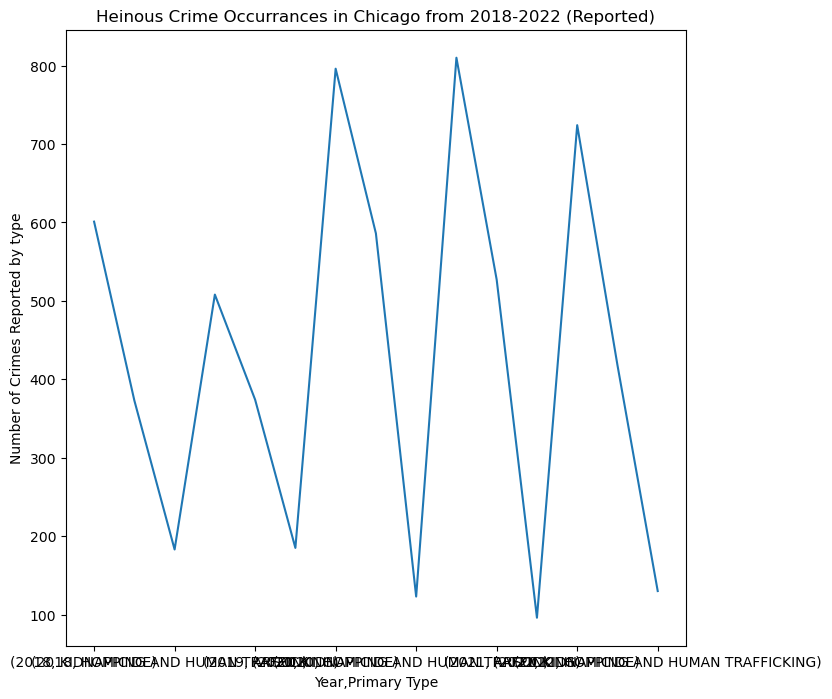

In [33]:
#Create a lineplot of the counts of each heinous crime category by year
heinous_line = heinous_crime_df.groupby(["Year"])["Primary Type"].value_counts()
heinous_line_df = pd.DataFrame(heinous_line)
heinous_line_df.plot(kind="line",figsize=(8,8),legend=False)
#set a title
plt.title("Heinous Crime Occurrances in Chicago from 2018-2022 (Reported)")
plt.ylabel("Number of Crimes Reported by type")
plt.show()